In [45]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

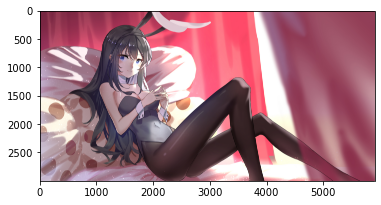

In [71]:
# img = Image.open('img.jpg')	#读入图片
# img
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img.shape
plt.imshow(img)

In [72]:
# w,h=img.size	# 查看图片尺寸
# print(w,h)		#打印图像尺寸，方便我们进行收东验证
h,w = img.shape
img.shape

ValueError: too many values to unpack (expected 2)

In [ ]:
# w_h=128/64#宽：高
# h_w=64/128#高：宽
# # w,h=img.size# 得到图片尺寸
# # if w>h*w_h:#宽比高值大，则保留高，裁剪宽
# #     #我们准备从左上角开始裁剪，这里输入左上角和右下角坐标
# #     #例如我是640X480图片，宽高比例128:64,因此640<480*128/64=960
# #     #也就是说我们需要保留完整的宽度，而去对高度进行裁剪
# #     new_img = img.crop((0, 0, h*w_h, h))
# # else:
# #     #宽比高值小，则保留宽，裁剪高
# #     new_img = img.crop((0, 0, w, h_w*w))
# # new_img.size
# if w>h*w_h:#宽比高值大，则保留高，裁剪宽
#     #我们准备从左上角开始裁剪，这里输入左上角和右下角坐标
#     #例如我是640X480图片，宽高比例128:64,因此640<480*128/64=960
#     #也就是说我们需要保留完整的宽度，而去对高度进行裁剪
#     # new_img = img.crop((0, 0, h*w_h, h))
#     new_img = img[:,:int(h*w_h)]
# else:
#     #宽比高值小，则保留宽，裁剪高
#     # new_img = img.crop((0, 0, w, h_w*w))
#     new_img = img[:int(h_w*w),:]


# new_img.shape
# # int(h_w*w)

(64, 128, 3)

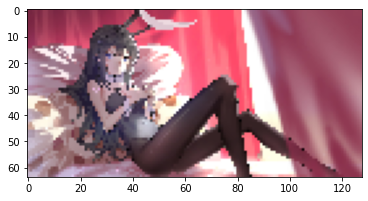

In [73]:
#进行图片缩放 这里用128*64的分辨率，即尺寸就是128X64
small_img=cv2.resize(img,(128,64))
#保存一下，等下我们验证用的
# small_img.save("small.jpg")
plt.imshow(small_img)
small_img.shape


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

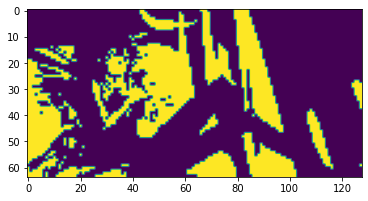

In [141]:
# # 转化为黑白图片#进行灰度处理
# black_img = small_img.convert("L")
# black_img
img = cv2.cvtColor(small_img,cv2.COLOR_RGB2GRAY)
# 二值化
ret,img=cv2.threshold(img, 150, 1, cv2.THRESH_BINARY);
# dst = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 1)
plt.imshow(img)
img


In [157]:
# #将8位一组放在一起
ob_list=[]
s="0b"
img = img.reshape(1024,8)
for i in img:
    for j in i:
        s+=str(j)
    ob_list.append(s)
    s="0b"      
ob_list

['0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00011000',
 '0b00000000',
 '0b00000000',
 '0b00111000',
 '0b00000001',
 '0b11111000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00011100',
 '0b00000000',
 '0b00100000',
 '0b00011100',
 '0b00000001',
 '0b11111000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00001110',
 '0b00000000',
 '0b00110000',
 '0b00011100',
 '0b00000001',
 '0b11111000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00001111',
 '0b10000000',
 '0b00110000',
 '0b00011100',
 '0b00000001',
 '0b11111100',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b00000000',
 '0b000000

In [158]:
#转换为16进制字符串 格式定位两位
# ox_list=['0x'+'%02x' % int(i, 2) for i in ob_list]
#下面的代码 似乎不会保证固定的两位格式 比如0,会转化成0x0，而我们期望0x00
#ox_list=[hex(int(i, 2)) for i in ob_list]
ox_list=['0x'+'%02x' % int(i, 2) for i in ob_list]
ox_list


['0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x18',
 '0x00',
 '0x00',
 '0x38',
 '0x01',
 '0xf8',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x1c',
 '0x00',
 '0x20',
 '0x1c',
 '0x01',
 '0xf8',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x0e',
 '0x00',
 '0x30',
 '0x1c',
 '0x01',
 '0xf8',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x0f',
 '0x80',
 '0x30',
 '0x1c',
 '0x01',
 '0xfc',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x07',
 '0xff',
 '0x30',
 '0x9c',
 '0x00',
 '0xfc',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x03',
 '0xff',
 '0xff',
 '0x1c',
 '0x00',
 '0xfc',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 '0x01',
 '0xff',
 '0xfc',
 '0x1c',
 '0x00',
 '0xfe',
 '0x00',
 '0x00',
 '0x00',
 '0x00',
 

In [159]:
j=0
for i in ox_list:
    j+=1
    print(i,end=",")
    if j%16==0:
        print("")


0x00,0x00,0x00,0x00,0x00,0x18,0x00,0x00,0x38,0x01,0xf8,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x1c,0x00,0x20,0x1c,0x01,0xf8,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x0e,0x00,0x30,0x1c,0x01,0xf8,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x0f,0x80,0x30,0x1c,0x01,0xfc,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x07,0xff,0x30,0x9c,0x00,0xfc,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x03,0xff,0xff,0x1c,0x00,0xfc,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x01,0xff,0xfc,0x1c,0x00,0xfe,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x00,0x7f,0x30,0x1c,0x00,0xfe,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x30,0x1c,0x00,0xfe,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x1c,0x00,0x30,0x1c,0x00,0xff,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x01,0x70,0x00,0x38,0x1e,0x00,0xff,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x80,0x00,0x38,0x1e,0x00,0xff,0x00,0x00,0x00,0x00,0x00,
0x00,0x00,0x00,0x00,0x00,0x0